In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import the dataset
pd.read_csv('D:/Test/Dataset/Day32.csv')


,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13
...,...,...,...,...,...,...,...,...
438,26945,other,12963,0,10330,2001-11-26,2004-06-11,2.46
439,26945,credit,1728,1,10248,2004-01-27,2005-06-21,5.27
440,26945,other,9329,0,10154,2001-12-17,2004-07-22,5.65
441,26945,home,4197,0,10333,2003-10-16,2005-07-10,4.50


In [3]:
df = pd.read_csv('Day32.csv', index_col='client_id')
df

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13
...,...,...,...,...,...,...,...
26945,other,12963,0,10330,2001-11-26,2004-06-11,2.46
26945,credit,1728,1,10248,2004-01-27,2005-06-21,5.27
26945,other,9329,0,10154,2001-12-17,2004-07-22,5.65


In [4]:
df.shape

(443, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


In [6]:
df.dtypes

loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

In [7]:
#Converting the datatype object to date type
#Convert load_id to object datatype
df['loan_id'] = df['loan_id'].astype('object')

#Convert repaid to object/categorical 
df['repaid'] = df['repaid'].astype('category')

#Convert loan_start & loan_end to date type
df['loan_start'] = pd.to_datetime(df['loan_start'], format='%Y-%m-%d')
df['loan_end'] = pd.to_datetime(df['loan_end'], format='%Y-%m-%d')


In [8]:
df.dtypes

loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

In [9]:
df.describe()

,loan_amount,rate
count,443.000000,443.000000
mean,7982.311512,3.217156
std,4172.891992,2.397168
min,559.000000,0.010000
25%,4232.500000,1.220000
50%,8320.000000,2.780000
75%,11739.000000,4.750000
max,14971.000000,12.620000


<Axes: >

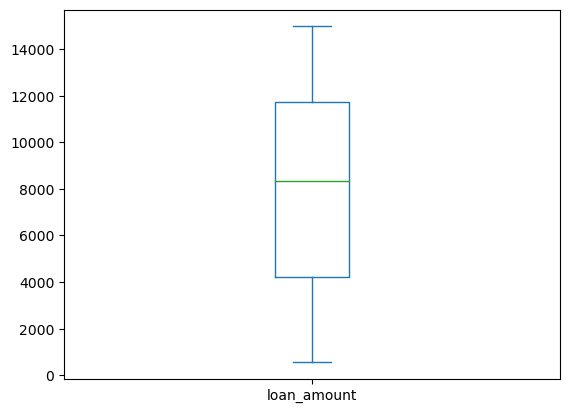

In [10]:
df['loan_amount'].plot(kind='box')

<Axes: >

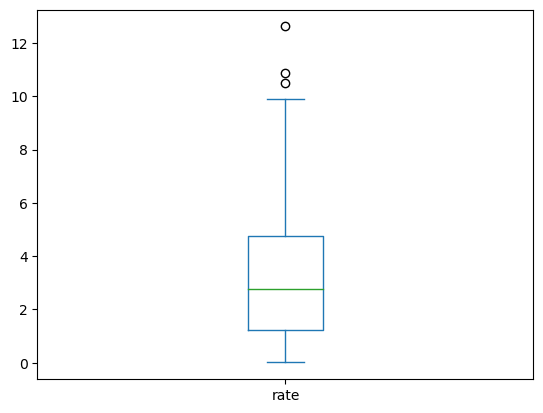

In [11]:
df['rate'].plot(kind='box')

In [12]:
df1=df[['loan_amount','rate']]
df1

,loan_amount,rate
client_id,,
46109,13672,2.15
46109,9794,1.25
46109,12734,0.68
46109,12518,1.24
46109,14049,3.13
...,...,...
26945,12963,2.46
26945,1728,5.27
26945,9329,5.65


In [13]:
df1.head()

,loan_amount,rate
client_id,,
46109,13672,2.15
46109,9794,1.25
46109,12734,0.68
46109,12518,1.24
46109,14049,3.13


In [14]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df1 = scale.fit_transform(df1)
df1

array([[ 1.36502962e+00, -4.45676908e-01],
       [ 4.34647423e-01, -8.21544457e-01],
       [ 1.13999132e+00, -1.05959390e+00],
       [ 1.08817014e+00, -8.25720763e-01],
       [ 1.45547678e+00, -3.63989115e-02],
       [-2.51263533e-01, -5.33379336e-01],
       [-4.33117505e-01,  2.61555546e+00],
       [ 1.12127812e+00,  3.85408004e-01],
       [ 7.38856969e-01,  9.45033020e-01],
       [-9.43412224e-01,  4.35523677e-01],
       [-1.52688038e+00,  1.36683993e+00],
       [ 1.01648330e-01, -1.13476741e+00],
       [ 2.57831622e-01, -9.84420394e-01],
       [-1.06960640e+00,  1.15384832e+00],
       [ 6.88715175e-01, -1.65864400e-01],
       [-1.54338725e-01, -8.04839232e-01],
       [ 9.52619355e-01,  3.45982920e-02],
       [ 5.00143642e-01, -4.05752176e-02],
       [ 9.66054477e-01, -1.01365454e+00],
       [-1.78094813e+00,  3.89584310e-01],
       [ 1.20620728e+00, -5.33379336e-01],
       [-9.91154890e-01, -1.00530192e+00],
       [ 1.04767198e-01, -9.96949312e-01],
       [ 9.

In [15]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
l1 = label.fit(df[['loan_type']])

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
#W: Apply one hot encoding to loan_type attribute

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
columntransformer=ColumnTransformer([('encoder', OneHotEncoder(),[0])], remainder='passthrough')

df['loan_amount'] = np.array(columntransformer.fit_transform(df[['loan_amount']]), dtype=np.str_)

df2 = np.array(columntransformer.fit_transform(df[['loan_amount']]), dtype=np.str)

ValueError: setting an array element with a sequence

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encodeer',OneHotEncoder(),[3])], remainder='passthrough')
X = ct.fit_transform(X)